# PART 2

In [31]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import normaltest
import pmdarima as pm
from pmdarima import auto_arima
import seaborn as sns
from statsmodels.tsa.stattools import coint
import numpy as np
import os

In [2]:
# path = 'C:\\Users\\ASUS\\Desktop\\423ProjectPart2\\data'
path = 'C:\\Users\\EylülRanaSaraç\\OneDrive - boun.edu.tr\\Masaüstü\\IE 423\\Project Part 2\\golden-girlz\\ProjectPart2\\20180101_20231121_bist30'

all_files = glob.glob(path + "/*_bist30.csv")

specified_files = [
    "20180101_20180401_bist30.csv", "20180402_20180701_bist30.csv",
    "20180702_20180930_bist30.csv", "20181001_20181230_bist30.csv",
    "20181231_20190331_bist30.csv", "20190401_20190630_bist30.csv",
    "20190701_20190929_bist30.csv", "20190930_20191229_bist30.csv",
    "20191230_20200329_bist30.csv", "20200330_20200628_bist30.csv",
    "20200629_20200927_bist30.csv", "20200928_20201227_bist30.csv"
]

# Filter files based on specified file dates
files_2018_to_2021 = [file for file in all_files if any(spec_file in file for spec_file in specified_files)]

# Loop through file paths to combine the data
combined_data_AKBNK = pd.DataFrame()
combined_data_GARAN = pd.DataFrame()


# AKBNK & GARAN

In [3]:
for file_path in files_2018_to_2021:
    # Read the file and set the 'timestamp' column as the index by converting it to a datetime object
    # After reading the data, set the frequency to hourly
    data = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')


    akbnk_data = data[data['short_name'] == 'AKBNK']
    garan_data = data[data['short_name'] == 'GARAN']

    # Concatenate the data
    combined_data_AKBNK = pd.concat([combined_data_AKBNK, akbnk_data])
    combined_data_GARAN = pd.concat([combined_data_GARAN, garan_data])

#### Stationarity test for AKBNK (ADF)

In [4]:
result_original_AKBNK = adfuller(combined_data_AKBNK['price'])
test_statistic_original_AKBNK = result_original_AKBNK[0]
p_value_original_AKBNK = result_original_AKBNK[1]

print(f'Test Statistic (AKBNK Original): {test_statistic_original_AKBNK}')
print(f'p-value (AKBNK Original): {p_value_original_AKBNK}')

if p_value_original_AKBNK <= 0.05:
    print('The AKBNK original time series is likely stationary.')
else:
    print('The AKBNK original time series is likely non-stationary.')

Test Statistic (AKBNK Original): -2.247401402380135
p-value (AKBNK Original): 0.18949322336630725
The AKBNK original time series is likely non-stationary.



#### Stationarity test for GARAN (ADF)

In [5]:
result_original_GARAN = adfuller(combined_data_GARAN['price'])
test_statistic_original_GARAN = result_original_GARAN[0]
p_value_original_GARAN = result_original_GARAN[1]

print(f'Test Statistic (GARAN Original): {test_statistic_original_GARAN}')
print(f'p-value (GARAN Original): {p_value_original_GARAN}')

if p_value_original_GARAN <= 0.05:
    print('The GARAN original time series is likely stationary.')
else:
    print('The GARAN original time series is likely non-stationary.')

Test Statistic (GARAN Original): -2.1986482928084854
p-value (GARAN Original): 0.2067364143396111
The GARAN original time series is likely non-stationary.


Given that the time series appears to be non-stationary, we can achieve stationarity by applying the differencing technique to the data.
#### Applying Differencing to Achieve Stationarity in the Time Series of AKBNK

In [6]:
differenced_data_AKBNK = combined_data_AKBNK['price'].diff().dropna()

### Testing Stationary Again

In [7]:
result_differenced_AKBNK = adfuller(differenced_data_AKBNK)
test_statistic_differenced_AKBNK = result_differenced_AKBNK[0]
p_value_differenced_AKBNK = result_differenced_AKBNK[1]

print(f'Test Statistic (AKBNK Differenced): {test_statistic_differenced_AKBNK}')
print(f'p-value (AKBNK Differenced): {p_value_differenced_AKBNK}')

if p_value_differenced_AKBNK <= 0.05:
    print('The AKBNK differenced time series is likely stationary.')
else:
    print('The AKBNK differenced time series is likely non-stationary.')


Test Statistic (AKBNK Differenced): -27.41028477815094
p-value (AKBNK Differenced): 0.0
The AKBNK differenced time series is likely stationary.


#### Plotting the differenced data for AKBNK

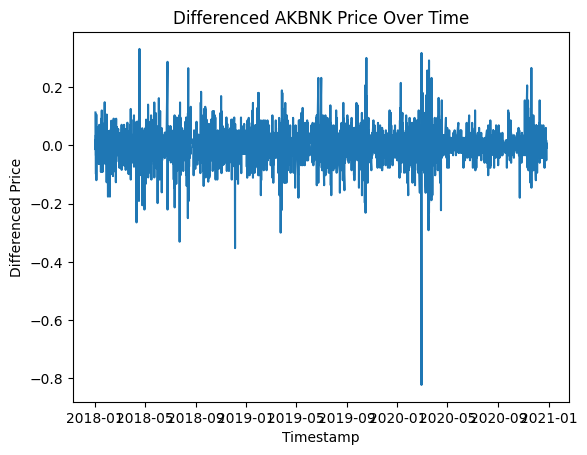

In [8]:
plt.plot(differenced_data_AKBNK.index, differenced_data_AKBNK)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced AKBNK Price Over Time')
plt.show()

As we expected because of the ADF test, it looks stationary.

#### Applying Differencing to Achieve Stationarity in the Time Series of GARAN

In [9]:
differenced_data_GARAN = combined_data_GARAN['price'].diff().dropna()

### Testing Stationary Again

In [10]:
result_differenced_GARAN = adfuller(differenced_data_GARAN)
test_statistic_differenced_GARAN = result_differenced_GARAN[0]
p_value_differenced_GARAN = result_differenced_GARAN[1]

print(f'Test Statistic (GARAN Differenced): {test_statistic_differenced_GARAN}')
print(f'p-value (GARAN Differenced): {p_value_differenced_GARAN}')

if p_value_differenced_GARAN <= 0.05:
    print('The GARAN differenced time series is likely stationary.')
else:
    print('The GARAN differenced time series is likely non-stationary.')

Test Statistic (GARAN Differenced): -26.646266852830433
p-value (GARAN Differenced): 0.0
The GARAN differenced time series is likely stationary.


#### Plotting the differenced data for GARAN

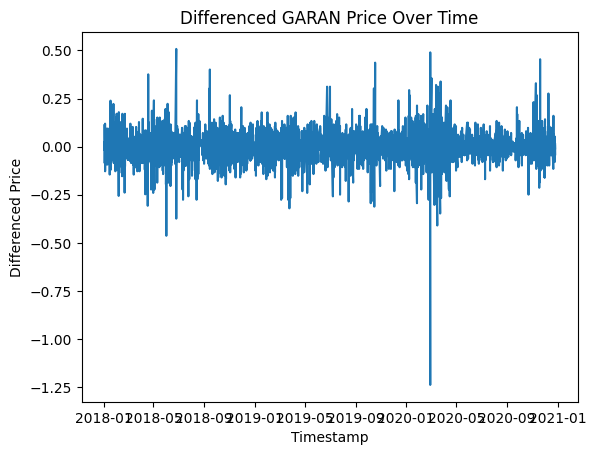

In [11]:
plt.plot(differenced_data_GARAN.index, differenced_data_GARAN)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced GARAN Price Over Time')
plt.show()

As we expected because of the ADF test, it looks stationary. Now we can fit ARIMA models to these stationary time series.

#### Fit an ARIMA model for AKBNK

In [12]:
model = pm.auto_arima(differenced_data_AKBNK, seasonal=False, trace=True)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-26096.631, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26095.451, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-26096.533, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-26096.473, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-26098.123, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-26095.209, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-26093.859, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-26100.289, Time=0.50 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-26100.010, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-26098.339, Time=0.88 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-26098.824, Time=0.97 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-26100.742, Time=0.74 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-26098.993, Time=0.70 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-26096.765, Time=0.64 sec
 ARIM

#### Fit an ARIMA model for GARAN

In [13]:
model = pm.auto_arima(differenced_data_GARAN, seasonal=False, trace=True)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21103.170, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-21104.338, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-21102.658, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-21102.651, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-21100.655, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21102.345, Time=0.34 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.691 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7440
Model:                        SARIMAX   Log Likelihood               10553.169
Date:                Mon, 11 Dec 2023   AIC                         -21104.338
Time:                        21:35:54   BIC                         -21097.423
Sample:                             0   HQIC                        -21101.96

Korelasyon Katsayısı: 0.9506436876760677


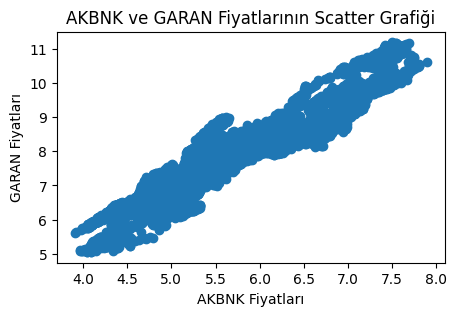

Cointegration Test Skoru: -2.6853952108570622
P-Değeri: 0.20487532620256754
Seriler arasında cointegration yok.


In [14]:
# İki hisse senedinin kapanış fiyatlarını alma
akbnk_prices = combined_data_AKBNK['price']
garan_prices = combined_data_GARAN['price']

# Korelasyon hesaplama
correlation = akbnk_prices.corr(garan_prices)
print(f'Korelasyon Katsayısı: {correlation}')

# Fiyatlar arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(5,3))
plt.scatter(akbnk_prices, garan_prices)
plt.xlabel('AKBNK Fiyatları')
plt.ylabel('GARAN Fiyatları')
plt.title('AKBNK ve GARAN Fiyatlarının Scatter Grafiği')
plt.show()

# Cointegration testi
score, p_value, _ = coint(akbnk_prices, garan_prices)

print(f'Cointegration Test Skoru: {score}')
print(f'P-Değeri: {p_value}')

# Eğer p-değeri 0.05'ten küçükse, seriler arasında cointegration olduğu kabul edilir
if p_value < 0.05:
    print('Seriler arasında cointegration var.')
else:
    print('Seriler arasında cointegration yok.')

### Spread Calculation for AKBNK & GARAN and Analysis of its Distribution 

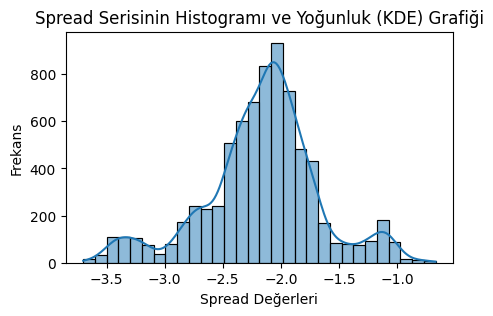

In [15]:
spread = akbnk_prices - garan_prices

plt.figure(figsize=(5, 3))
sns.histplot(spread, kde=True, bins=30)
plt.title('Spread Serisinin Histogramı ve Yoğunluk (KDE) Grafiği')
plt.xlabel('Spread Değerleri')
plt.ylabel('Frekans')
plt.show()

### Fitting an ARIMA Model to the Spread

In [16]:
model = auto_arima(spread, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-29355.134, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29293.902, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-29354.874, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-29356.327, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29295.798, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29355.018, Time=1.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-29354.863, Time=1.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-29352.584, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-29358.199, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-29356.887, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-29356.723, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-29356.749, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-29354.453, Time=0.70 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 10.491 sec

### Testing the ARIMA Model's Reliability

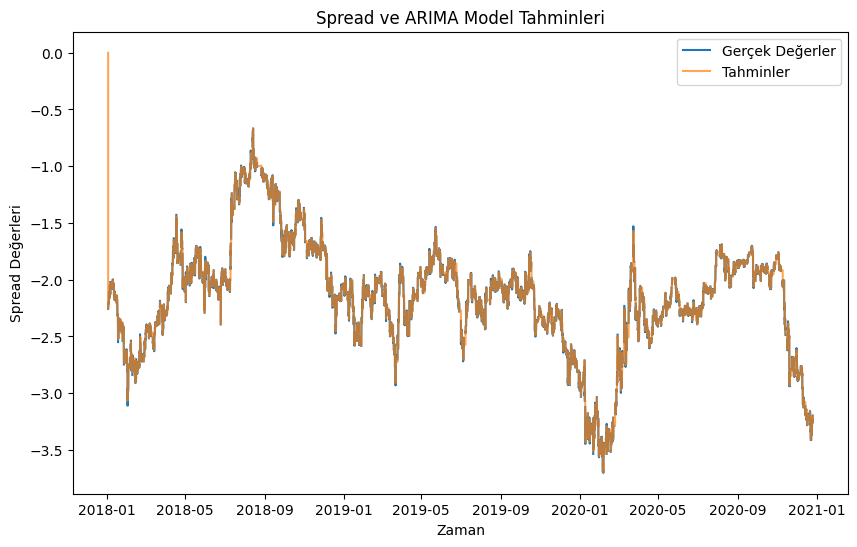

In [17]:
# Zaman serisine saatlik frekans ekleme ve sıralama
spread = spread[~spread.index.duplicated(keep='first')]
spread = spread.asfreq('H').sort_index()

# Modeli fit etme
model = SARIMAX(spread, order=(1, 0, 2), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# Modelin tahminlerini elde etme ve çizdirme
predictions = model_fit.predict(start=spread.index[0], end=spread.index[-1])

plt.figure(figsize=(10, 6))
plt.plot(spread, label='Gerçek Değerler')
plt.plot(predictions, label='Tahminler', alpha=0.7)
plt.title('Spread ve ARIMA Model Tahminleri')
plt.xlabel('Zaman')
plt.ylabel('Spread Değerleri')
plt.legend()
plt.show()

### Setting Control Limits According to Statistical Features of the Spread

In [18]:
spread_mean = spread.mean()
spread_std = spread.std()

upper_limit = spread_mean + 1 * spread_std
lower_limit = spread_mean - 1 * spread_std

### Generating Signals

In [19]:
def generate_trading_signals(spread_series, upper_limit, lower_limit):
    in_position = False
    last_signal = 'No Signal'
    signals = []

    for value in spread_series:
        if not in_position:
            if value > upper_limit:
                signal = 'Sell'
                in_position = True
            elif value < lower_limit:
                signal = 'Buy'
                in_position = True
            else:
                signal = 'No Signal'
        else:
            if (last_signal == 'Sell' and value <= upper_limit) or \
               (last_signal == 'Buy' and value >= lower_limit):
                signal = 'Buy' if last_signal == 'Sell' else 'Sell'
                in_position = False
            else:
                signal = last_signal

        last_signal = signal
        signals.append(signal)

    return pd.Series(signals, index=spread_series.index)

# Fonksiyonu kullanarak sinyalleri üretme
signals_series = generate_trading_signals(spread, upper_limit, lower_limit)

signals_series.value_counts()


No Signal    19363
Buy           3718
Sell          3041
Name: count, dtype: int64

### Setting Control Limits and Generating Signals According to ARIMA Model

In [20]:
def generate_signals_with_arima(spread, order):
    # Modeli fit et
    model = SARIMAX(spread, order=order, seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)

    # Gelecekteki değerleri tahmin et
    forecast = model_fit.get_prediction(end=model_fit.nobs)
    predicted_mean = forecast.predicted_mean
    predicted_std = forecast.se_mean

    # Kontrol limitleri hesaplama
    upper_limit = predicted_mean + 2 * predicted_std
    lower_limit = predicted_mean - 2 * predicted_std

    # Gerçek değerlerle tahminleri karşılaştırarak sinyalleri oluştur
    signals = pd.Series(index=spread.index)
    for i in range(len(spread)):
        if spread.iloc[i] > upper_limit.iloc[i]:
            signals.iloc[i] = 'Sell'
        elif spread.iloc[i] < lower_limit.iloc[i]:
            signals.iloc[i] = 'Buy'
        else:
            signals.iloc[i] = 'No Signal'

    return signals

arima_order = (0, 1, 1)
signals_with_arima = generate_signals_with_arima(spread, arima_order)

signals_with_arima.value_counts()

C:\Users\EylülRanaSaraç\AppData\Local\Temp\ipykernel_5808\3463692038.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Signal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  signals.iloc[i] = 'No Signal'


No Signal    25703
Sell           218
Buy            201
Name: count, dtype: int64

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# KOZAA & KOZAL

Korelasyon Katsayısı: 0.9359438709340239


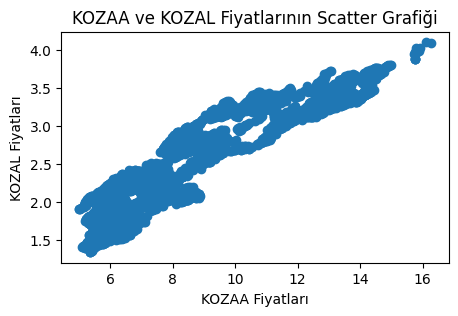

Cointegration Test Skoru: -2.2341679296386134
P-Değeri: 0.4068201446940258
Seriler arasında cointegration yok.


In [21]:
combined_data_KOZAA = pd.DataFrame()
combined_data_KOZAL = pd.DataFrame()

for file_path in files_2018_to_2021:
    # Read the file and set the 'timestamp' column as the index by converting it to a datetime object
    # After reading the data, set the frequency to hourly
    data = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

    kozaa_data = data[data['short_name'] == 'KOZAA']
    kozal_data = data[data['short_name'] == 'KOZAL']

    # Concatenate the data
    combined_data_KOZAA = pd.concat([combined_data_KOZAA, kozaa_data])
    combined_data_KOZAL = pd.concat([combined_data_KOZAL, kozal_data])

combined_data_KOZAA_2023 = pd.DataFrame()
combined_data_KOZAL_2023 = pd.DataFrame()

# İki hisse senedinin kapanış fiyatlarını al
kozaa_prices = combined_data_KOZAA['price']
kozal_prices = combined_data_KOZAL['price']

# Korelasyon hesaplama
correlation = kozaa_prices.corr(kozal_prices)
print(f'Korelasyon Katsayısı: {correlation}')

# Fiyatlar arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(5,3))
plt.scatter(kozaa_prices, kozal_prices)
plt.xlabel('KOZAA Fiyatları')
plt.ylabel('KOZAL Fiyatları')
plt.title('KOZAA ve KOZAL Fiyatlarının Scatter Grafiği')
plt.show()

# Cointegration testi
score, p_value, _ = coint(kozaa_prices, kozal_prices)

print(f'Cointegration Test Skoru: {score}')
print(f'P-Değeri: {p_value}')

# Eğer p-değeri 0.05'ten küçükse, seriler arasında cointegration olduğu kabul edilir
if p_value < 0.05:
    print('Seriler arasında cointegration var.')
else:
    print('Seriler arasında cointegration yok.')


### Spread Calculation for KOZAA & KOZAL and Analysis of its Distribution 

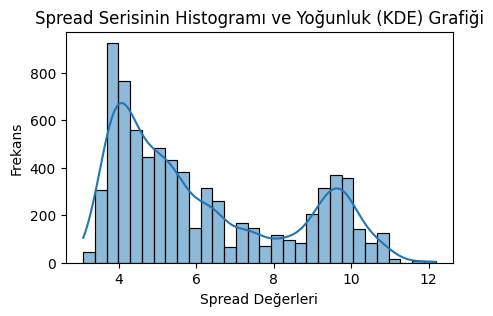

In [22]:
spread = kozaa_prices - kozal_prices

plt.figure(figsize=(5, 3))
sns.histplot(spread, kde=True, bins=30)
plt.title('Spread Serisinin Histogramı ve Yoğunluk (KDE) Grafiği')
plt.xlabel('Spread Değerleri')
plt.ylabel('Frekans')
plt.show()

### Fitting an ARIMA Model to the Spread

In [23]:
model = auto_arima(spread, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17658.760, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17640.231, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17657.145, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17658.363, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17641.061, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17660.783, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17662.565, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-17660.752, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17661.018, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-17655.910, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17663.169, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17659.052, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17661.401, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-17661.367, Time=0.69 sec
 ARIM

### Testing the ARIMA Model's Reliability

c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


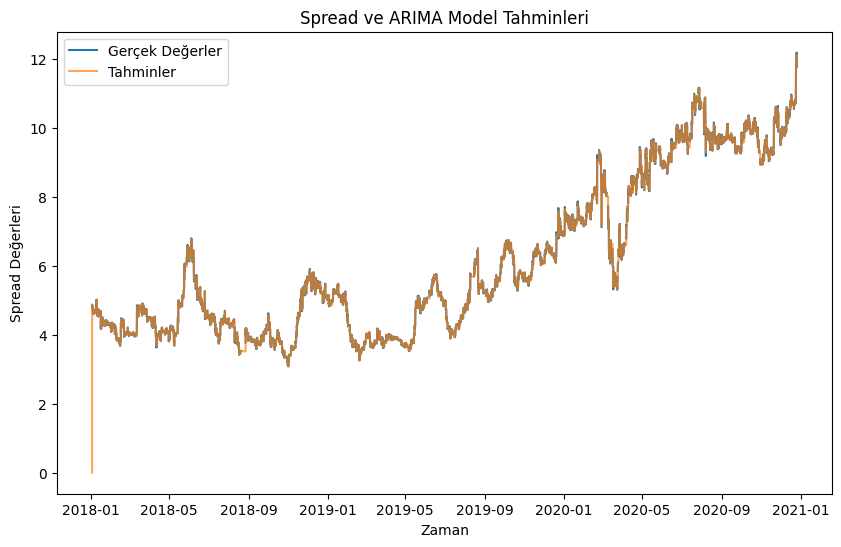

In [24]:
# Zaman serisine saatlik frekans ekleme ve sıralama
spread = spread[~spread.index.duplicated(keep='first')]
spread = spread.asfreq('H').sort_index()

# Modeli fit etme
model = SARIMAX(spread, order=(1, 0, 2), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# Modelin tahminlerini elde etme ve çizdirme
predictions = model_fit.predict(start=spread.index[0], end=spread.index[-1])

plt.figure(figsize=(10, 6))
plt.plot(spread, label='Gerçek Değerler')
plt.plot(predictions, label='Tahminler', alpha=0.7)
plt.title('Spread ve ARIMA Model Tahminleri')
plt.xlabel('Zaman')
plt.ylabel('Spread Değerleri')
plt.legend()
plt.show()


### Setting Control Limits According to Statistical Features of the Spread

In [25]:
spread_mean = spread.mean()
spread_std = spread.std()

upper_limit = spread_mean + 1 * spread_std
lower_limit = spread_mean - 1 * spread_std

### Generating Signals

In [26]:
def generate_trading_signals(spread_series, upper_limit, lower_limit):
    in_position = False
    last_signal = 'No Signal'
    signals = []

    for value in spread_series:
        if not in_position:
            if value > upper_limit:
                signal = 'Sell'
                in_position = True
            elif value < lower_limit:
                signal = 'Buy'
                in_position = True
            else:
                signal = 'No Signal'
        else:
            if (last_signal == 'Sell' and value <= upper_limit) or \
               (last_signal == 'Buy' and value >= lower_limit):
                signal = 'Buy' if last_signal == 'Sell' else 'Sell'
                in_position = False
            else:
                signal = last_signal

        last_signal = signal
        signals.append(signal)

    return pd.Series(signals, index=spread_series.index)

# Fonksiyonu kullanarak sinyalleri üretme
signals_series = generate_trading_signals(spread, upper_limit, lower_limit)

# Sinyallerin sayısını gösterelim
signals_series.value_counts()


No Signal    16179
Sell          6151
Buy           3792
Name: count, dtype: int64

### Setting Control Limits and Generating Signals According to ARIMA Model

In [27]:
# for KOZAA & KOZAL Spread
arima_order = (1, 0, 2)
signals_with_arima = generate_signals_with_arima(spread, arima_order)

signals_with_arima.value_counts()

c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\EylülRanaSaraç\AppData\Local\Temp\ipykernel_5808\3463692038.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Signal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  signals.iloc[i] = 'No Signal'


No Signal    25751
Sell           202
Buy            169
Name: count, dtype: int64

### Calculating Profit

In [42]:
specified_files_2021 = [
    "20201228_20210328_bist30.csv", "20210329_20210627_bist30.csv",
    "20210628_20210926_bist30.csv", "20210927_20211226_bist30.csv"
]

files_2021 = [file for file in all_files if any(spec_file_2021 in file for spec_file_2021 in specified_files_2021)]

df_list = []

# Loop through the files and read them into individual dataframes
for filename in files_2021:
    df = pd.read_csv(filename, parse_dates=['timestamp'])
    df_list.append(df)
    
df_2021_list = []

for file in files_2021:
    df = pd.read_csv(file)
    df_2021_list.append(df)

df_2021 = pd.concat(df_2021_list, ignore_index=True)
df_2021["timestamp"] = pd.to_datetime(df_2021["timestamp"])
df_2021.set_index("timestamp", inplace=True)
df_2021 = df_2021.sort_values(by="timestamp")

stock_names = df_2021['short_name'].unique()
all_df_2021 = pd.DataFrame()
for stock in stock_names:
    stock_data = df_2021.loc[df_2021["short_name"] == stock].iloc[:,[0,1]]
    all_df_2021[stock] = stock_data["price"]


all_df_2021_diff = all_df_2021.diff().dropna()

akbnk_2021 = all_df_2021_diff["AKBNK"].values.reshape(-1,1)
garan_2021 = all_df_2021_diff["GARAN"].values.reshape(-1,1)


In [30]:
def calculate_profit(spread, signals, initial_capital):
    in_position = False
    entry_price = 0
    total_profit = 0
    capital = initial_capital

    for i in range(len(signals)):
        # Eğer pozisyonda değilsek ve 'Buy' sinyali alırsak, pozisyon aç
        if not in_position and signals.iloc[i] == 'Buy' and capital > 0:
            in_position = True
            entry_price = spread.iloc[i]
            # İşlem için kullanılacak miktarı belirle
            trade_amount = capital  # Burada tüm sermayeyi kullanıyoruz, isteğe bağlı olarak değiştirilebilir

        # Eğer pozisyonda isek ve 'Sell' sinyali alırsak, pozisyonu kapat ve karı hesapla
        elif in_position and signals.iloc[i] == 'Sell':
            exit_price = spread.iloc[i]
            profit = (exit_price - entry_price) * trade_amount
            total_profit += profit
            in_position = False
            capital += profit  # Karı sermayeye ekle

    # Eğer yıl sonunda hala pozisyonda isek, o pozisyonu kapat ve son karı hesapla
    if in_position:
        exit_price = spread.iloc[-1]
        profit = (exit_price - entry_price) * trade_amount
        total_profit += profit
        capital += profit

    return total_profit, capital

initial_capital = 10000 

# calculating total profit and final capital
total_profit, final_capital = calculate_profit(spread_2021, signals_2021_with_arima, initial_capital)
print(f"Toplam Kar/Zarar: {total_profit}, Son Sermaye: {final_capital}")


Toplam Kar/Zarar: -10909.356734815412, Son Sermaye: -909.3567348154102
